#Code Book - Team Fast and Curious

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
tw = pd.read_csv("/content/drive/MyDrive/elon_musk_tweets 3.csv")
tw.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1544379368478212100,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitabl...,NaN,Twitter for iPhone,335,6542,False
1,1544377493263720450,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:47:42+00:00,"Sock Con, the conference for socks",NaN,Twitter for iPhone,1451,30753,False
2,1544377130590552064,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:46:15+00:00,Always something new for the magazine cover an...,NaN,Twitter for iPhone,1284,28610,False
3,1544375575724400645,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:40:05+00:00,@ExplainThisBob This guy gets it,NaN,Twitter for iPhone,131,3640,False
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False


In [ ]:
print("Earliest date:",tw['date'].min())
print("Latest date:",tw['date'].max())

Earliest date: 2022-07-05 13:46:20+00:00
Latest date: 2023-06-13 01:49:01+00:00


In [ ]:
tw['date'] = pd.to_datetime(tw['date'])
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                5904 non-null   int64              
 1   user_name         5904 non-null   object             
 2   user_location     1050 non-null   object             
 3   user_description  1422 non-null   object             
 4   user_created      5904 non-null   object             
 5   user_followers    5904 non-null   int64              
 6   user_friends      5904 non-null   int64              
 7   user_favourites   5904 non-null   int64              
 8   user_verified     5904 non-null   bool               
 9   date              5904 non-null   datetime64[ns, UTC]
 10  text              5904 non-null   object             
 11  hashtags          2 non-null      object             
 12  source            5904 non-null   object             
 13  ret

In [ ]:
#create a date from earliest to latest
start_date = tw['date'].min()
last_date = tw['date'].max()
date_range = pd.date_range(start=start_date, end=last_date)
date_df = pd.DataFrame(date_range)
date_df.rename(columns={0 : 'date'}, inplace=True)
date_df['date'] = pd.to_datetime(date_df['date']).dt.date
date_df

,date
0,2022-07-05
1,2022-07-06
2,2022-07-07
3,2022-07-08
4,2022-07-09
...,...
338,2023-06-08
339,2023-06-09
340,2023-06-10
341,2023-06-11


In [ ]:
tw_tcount = pd.DataFrame(tw[['date', 'text']])
tw_tcount['date'] = pd.to_datetime(tw_tcount['date']).dt.date
tw_tcount['he_tweet'] = np.where(tw_tcount['text'].notnull() & (tw_tcount['text'] != ''), 1, 0)
tw_tcount.drop('text', axis=1, inplace=True)
tw_df = tw_tcount.groupby('date')['he_tweet'].sum().reset_index()

In [ ]:
tw_date = pd.merge(date_df, tw_df, on='date', how='left')
tw_date = pd.DataFrame(tw_date)
tw_date['date'] = pd.to_datetime(tw_date['date'])

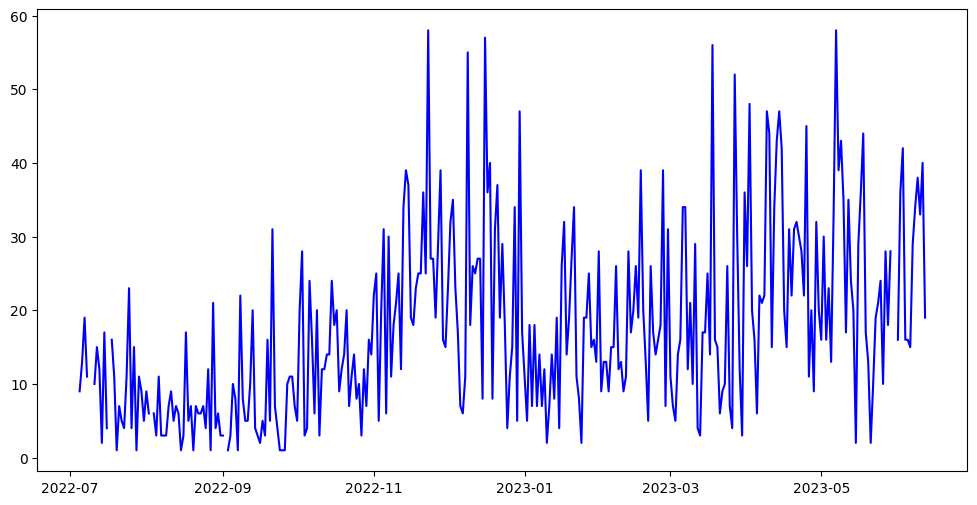

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(tw_date['date'], tw_date['he_tweet'],  linestyle='-', color='b', label='Value')

In [ ]:
tesla = pd.read_csv("/content/drive/MyDrive/TESLA.csv")
tesla.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [ ]:
#drop unnamed : 0
tesla.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
tesla_df = tesla[['Date', 'Close']]
tesla_df = pd.DataFrame(tesla_df)
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'], format='%m/%d/%y')
tesla_df.rename(columns={'Date':'date', 'Close':'price'}, inplace=True)

In [ ]:
# Step 2: Change the date format to 'YYYY-MM-DD'
tesla_df['date'] = pd.to_datetime(tesla_df['date'].dt.strftime('%Y-%m-%d'))

In [ ]:
first_d = pd.to_datetime('2022-07-05')
last_d = pd.to_datetime('2023-06-13')
tesla_dff = tesla_df.loc[(tesla_df['date'] >= first_d) & (tesla_df['date'] <= last_d)]
tesla_dff.head(5)

,date,price
3024,2022-07-05,233.066666
3025,2022-07-06,231.733337
3026,2022-07-07,244.543335
3027,2022-07-08,250.763336
3028,2022-07-11,234.343338


In [ ]:
# Check if both DataFrames have the same length
if len(tesla_dff) == len(tw_date):
    # Check if all dates are the same
    if (tesla_dff['date'] == tw_date['date']).all():
        print("All the same")
    else:
        print("Nope")
else:
    print("DataFrames have different lengths")

DataFrames have different lengths


In [ ]:
tweet_tesla = tw_date.merge(tesla_dff, on='date', how = 'outer')
tweet_tesla

,date,he_tweet,price
0,2022-07-05,9.0,233.066666
1,2022-07-06,13.0,231.733337
2,2022-07-07,19.0,244.543335
3,2022-07-08,11.0,250.763336
4,2022-07-09,NaN,NaN
...,...,...,...
339,2023-06-09,38.0,244.399994
340,2023-06-10,33.0,NaN
341,2023-06-11,40.0,NaN
342,2023-06-12,19.0,249.830002


## Checking Missing Values

<Axes: >

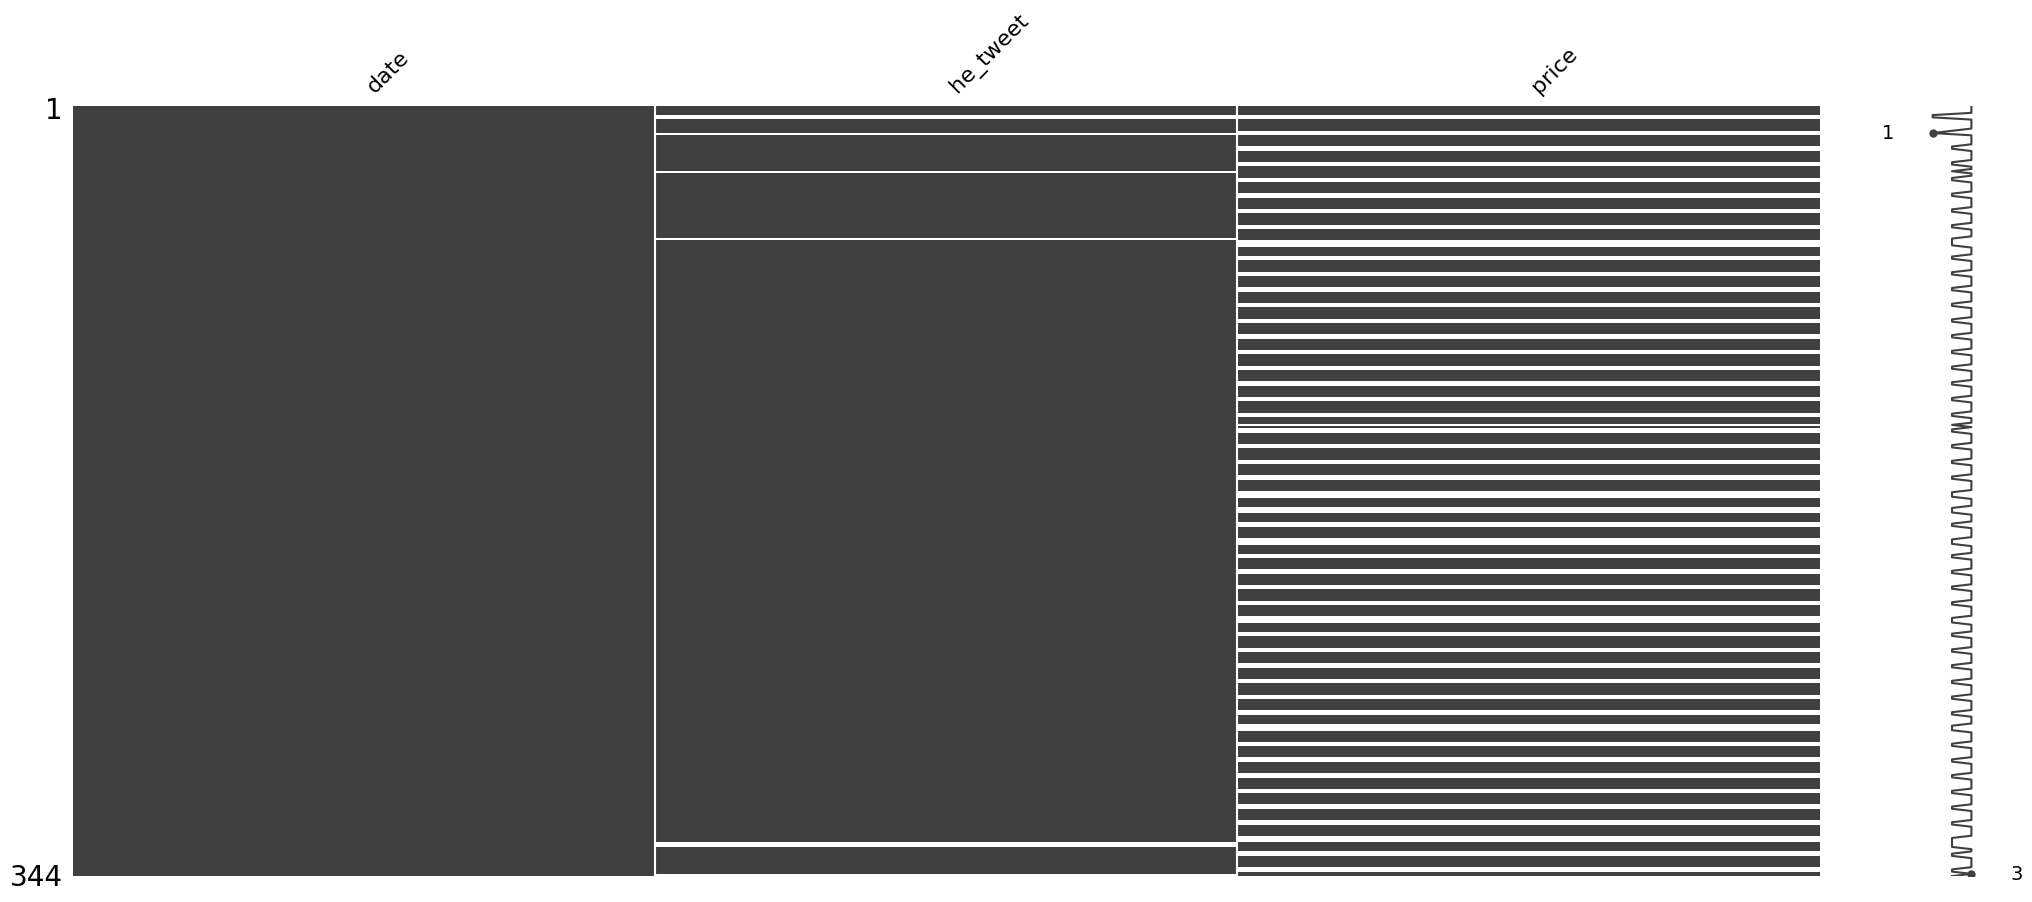

In [ ]:
import missingno as msno

msno.matrix(tweet_tesla)


In [ ]:
tweet_tesla.isna().sum()


,0
date,0
he_tweet,8
price,106


In [ ]:
tweet_tesla.dropna(subset=['price'], inplace=True)
tweet_tesla.isna().sum()

,0
date,0
he_tweet,5
price,0


In [ ]:
tweet_tesla.fillna({'he_tweet': 0}, inplace=True)

In [ ]:
tweet_tesla.isna().sum()

,0
date,0
he_tweet,0
price,0


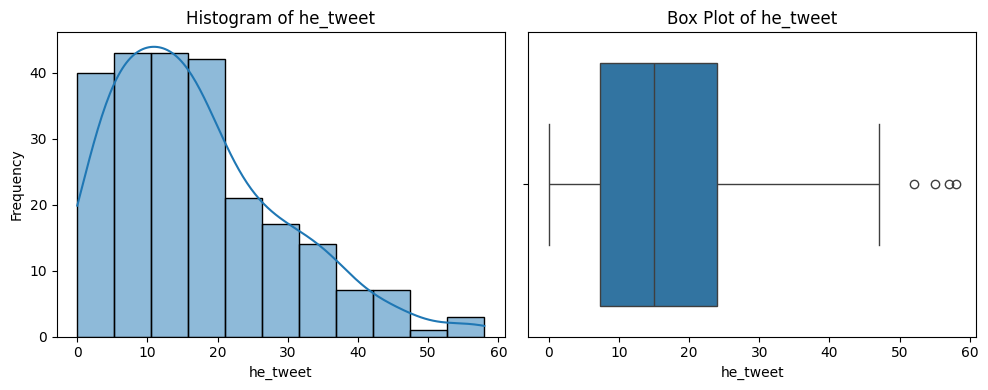

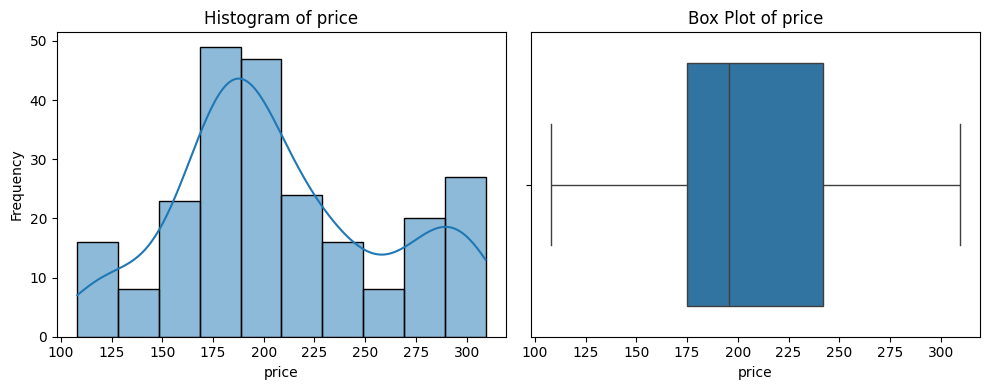

In [ ]:
def hist_box(data, col):
    plt.figure(figsize=(10,4))

    # Create the histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Create the box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

for col in tweet_tesla.columns:
    if not(tweet_tesla[col].dtype == int or tweet_tesla[col].dtype ==float):
        continue
    hist_box(tweet_tesla, col)

#Hypothesis Setting

##H0 = Elon Musk's Tweet has no impact on Tesla's Stock

##H1 = Elon Musk's Tweet has impact on Tesla's Stock

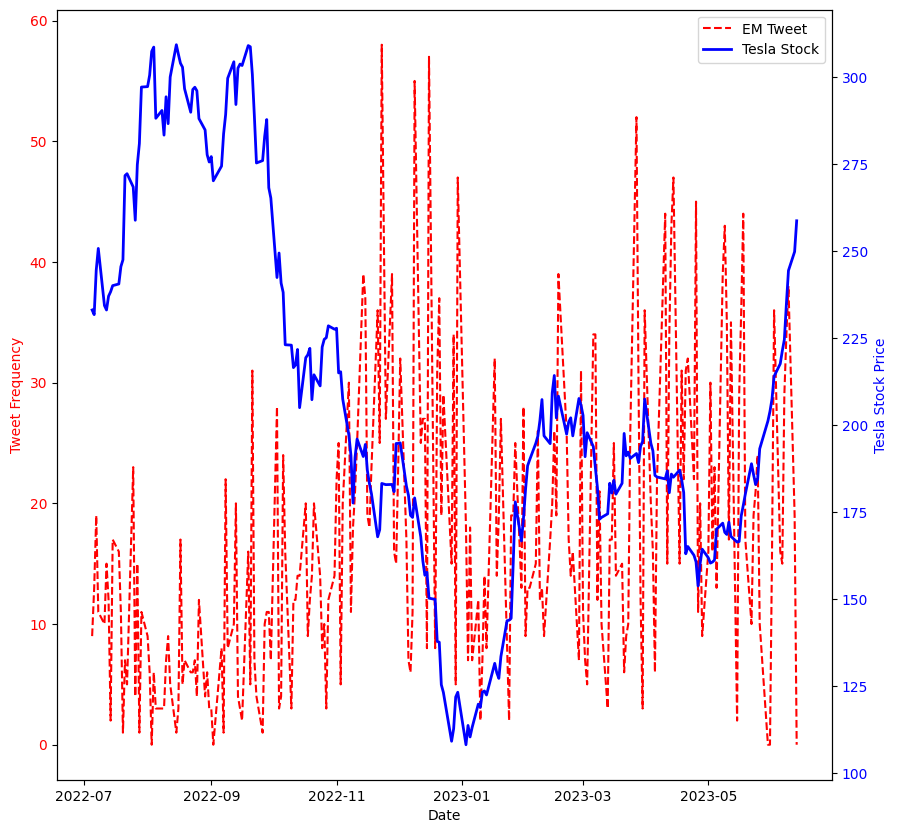

In [ ]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 10))

# Plotting Elon Musk's tweets
ax1.plot(tweet_tesla['date'], tweet_tesla['he_tweet'], color='r', linestyle='--', label='EM Tweet')
ax1.set_xlabel("Date")
ax1.set_ylabel("Tweet Frequency", color='r')
ax1.tick_params(axis='y', labelcolor='r')


# Creating a second y-axis for Tesla stock prices
ax2 = ax1.twinx()
ax2.plot(tweet_tesla['date'], tweet_tesla['price'], color='b', linestyle='-', linewidth = 2, label='Tesla Stock')
ax2.set_ylabel("Tesla Stock Price", color='b')
ax2.tick_params(axis='y', labelcolor='b')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()

P-Value & Correlation Coefficient of Tesla Stock price and Elon Musk's tweet:
P-Value: 1e-10
Correlation Coefficient: -0.4079106236633466


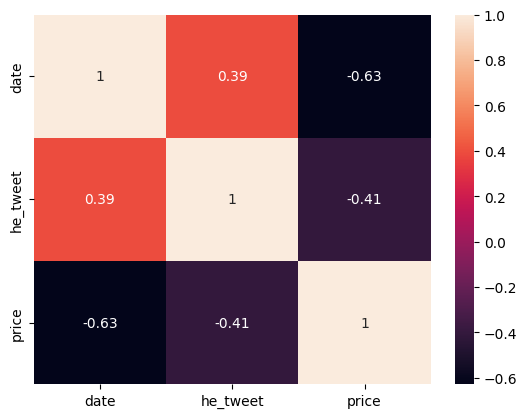

In [ ]:
from scipy.stats import pearsonr
#let's see the correlation
tt_corr = tweet_tesla.corr()
sns.heatmap(tt_corr, annot=True)
# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(tweet_tesla['price'], tweet_tesla['he_tweet'])
# Print the p-value
print("P-Value & Correlation Coefficient of Tesla Stock price and Elon Musk's tweet:")
print("P-Value:", round(p_value, 10))
print("Correlation Coefficient:", correlation_coefficient)

P-Value & Correlation Coefficient of Tesla Stock price and Elon Musk's tweet:

P-Value: 0.00004539992

Correlation Coefficient: -0.4079106236633467

The correlation coefficient is around -0.41, indicating a moderate negative correlation between Elon Musk's tweets and Tesla's stock price. The p-value is 0.0000000001, which is significantly lower than 0.05. Therefore, we can reject the null hypothesis, suggesting that Elon Musk's tweets have a statistically significant impact on Tesla's stock price, even though the correlation is negative.

#Calculated Fluctuation Percentage

The above analysis is focusing on Tesla's stock price against his tweet. However, it doesn't truly capture the fluctuation of the stock, thus in this section we will be creating another column for the stock fluctuation/ growth.

In [ ]:
tweet_tesla['fluctuated_percent'] = tweet_tesla['price'].pct_change() * 100
tweet_tesla.head(5)

,date,he_tweet,price,fluctuated_percent
0,2022-07-05,9.0,233.066666,NaN
1,2022-07-06,13.0,231.733337,-0.572080
2,2022-07-07,19.0,244.543335,5.527905
3,2022-07-08,11.0,250.763336,2.543517
6,2022-07-11,10.0,234.343338,-6.548006


<Axes: >

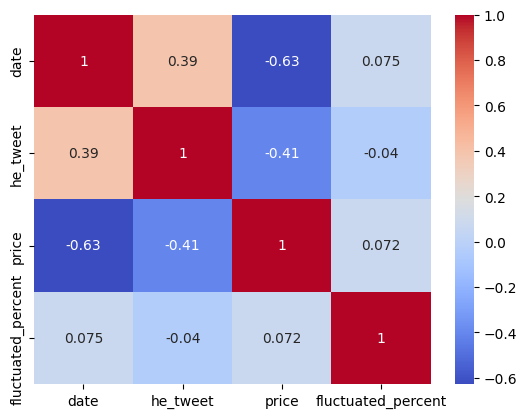

In [ ]:
#tt_corr2 is with fluctuated percentage
tt_corr2 = tweet_tesla.corr()
sns.heatmap(tt_corr2, annot=True, cmap='coolwarm')

Surprisingly, the correlation between the percentage fluctuation of Tesla's stock and Elon Musk's tweets is not significant. In other words, while Elon Musk's tweets have a moderate negative impact on Tesla's overall stock price, this does not translate into immediate changes in the stock's day-to-day fluctuations. This indicates that the tweets do not significantly affect the daily percentage changes in the stock price.



#Calculated Fluctuation Percentage with Lagged analysis


Now we know that the same-day fluctuation percentage does not correlate with Elon Musk's tweets. This leads us to another question: What if there is a delayed effect on the fluctuated percentage?



In [ ]:
#changing price and fluctuated percentage to match the rest
tweet_tesla.rename(columns={'price':'same_day_price', 'fluctuated_percentage':'fluctuation_from_same_day'}, inplace=True)

In [ ]:
# Create lagged stock price columns
tweet_tesla['lagged_price_1'] = tweet_tesla['same_day_price'].shift(1)  # 1-day lag
tweet_tesla['lagged_price_2'] = tweet_tesla['same_day_price'].shift(2)  # 2-day lag
tweet_tesla['lagged_price_3'] = tweet_tesla['same_day_price'].shift(3)  # 3-day lag
tweet_tesla['lagged_price_4'] = tweet_tesla['same_day_price'].shift(4)  # 4-day lag
tweet_tesla['lagged_price_5'] = tweet_tesla['same_day_price'].shift(5)  # 5-day lag

# Calculate fluctuation percentage based on lagged prices
tweet_tesla['fluctuation_from_lag_1'] = (tweet_tesla['same_day_price'] - tweet_tesla['lagged_price_1']) / tweet_tesla['lagged_price_1'] * 100
tweet_tesla['fluctuation_from_lag_2'] = (tweet_tesla['same_day_price'] - tweet_tesla['lagged_price_2']) / tweet_tesla['lagged_price_2'] * 100
tweet_tesla['fluctuation_from_lag_3'] = (tweet_tesla['same_day_price'] - tweet_tesla['lagged_price_3']) / tweet_tesla['lagged_price_3'] * 100
tweet_tesla['fluctuation_from_lag_4'] = (tweet_tesla['same_day_price'] - tweet_tesla['lagged_price_4'])/ tweet_tesla['lagged_price_4'] * 100
tweet_tesla['fluctuation_from_lag_5'] = (tweet_tesla['same_day_price'] - tweet_tesla['lagged_price_5'])/ tweet_tesla['lagged_price_5'] * 100

tweet_tesla.head(5)

,date,he_tweet,same_day_price,fluctuated_percent,lagged_price_1,lagged_price_2,lagged_price_3,lagged_price_4,lagged_price_5,fluctuation_from_lag_1,fluctuation_from_lag_2,fluctuation_from_lag_3,fluctuation_from_lag_4,fluctuation_from_lag_5
0,2022-07-05,9.0,233.066666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-07-06,13.0,231.733337,-0.572080,233.066666,NaN,NaN,NaN,NaN,-0.572080,NaN,NaN,NaN,NaN
2,2022-07-07,19.0,244.543335,5.527905,231.733337,233.066666,NaN,NaN,NaN,5.527905,4.924200,NaN,NaN,NaN
3,2022-07-08,11.0,250.763336,2.543517,244.543335,231.733337,233.066666,NaN,NaN,2.543517,8.212025,7.592965,NaN,NaN
6,2022-07-11,10.0,234.343338,-6.548006,250.763336,244.543335,231.733337,233.066666,NaN,-6.548006,-4.171039,1.126295,0.547771,NaN


<Axes: >

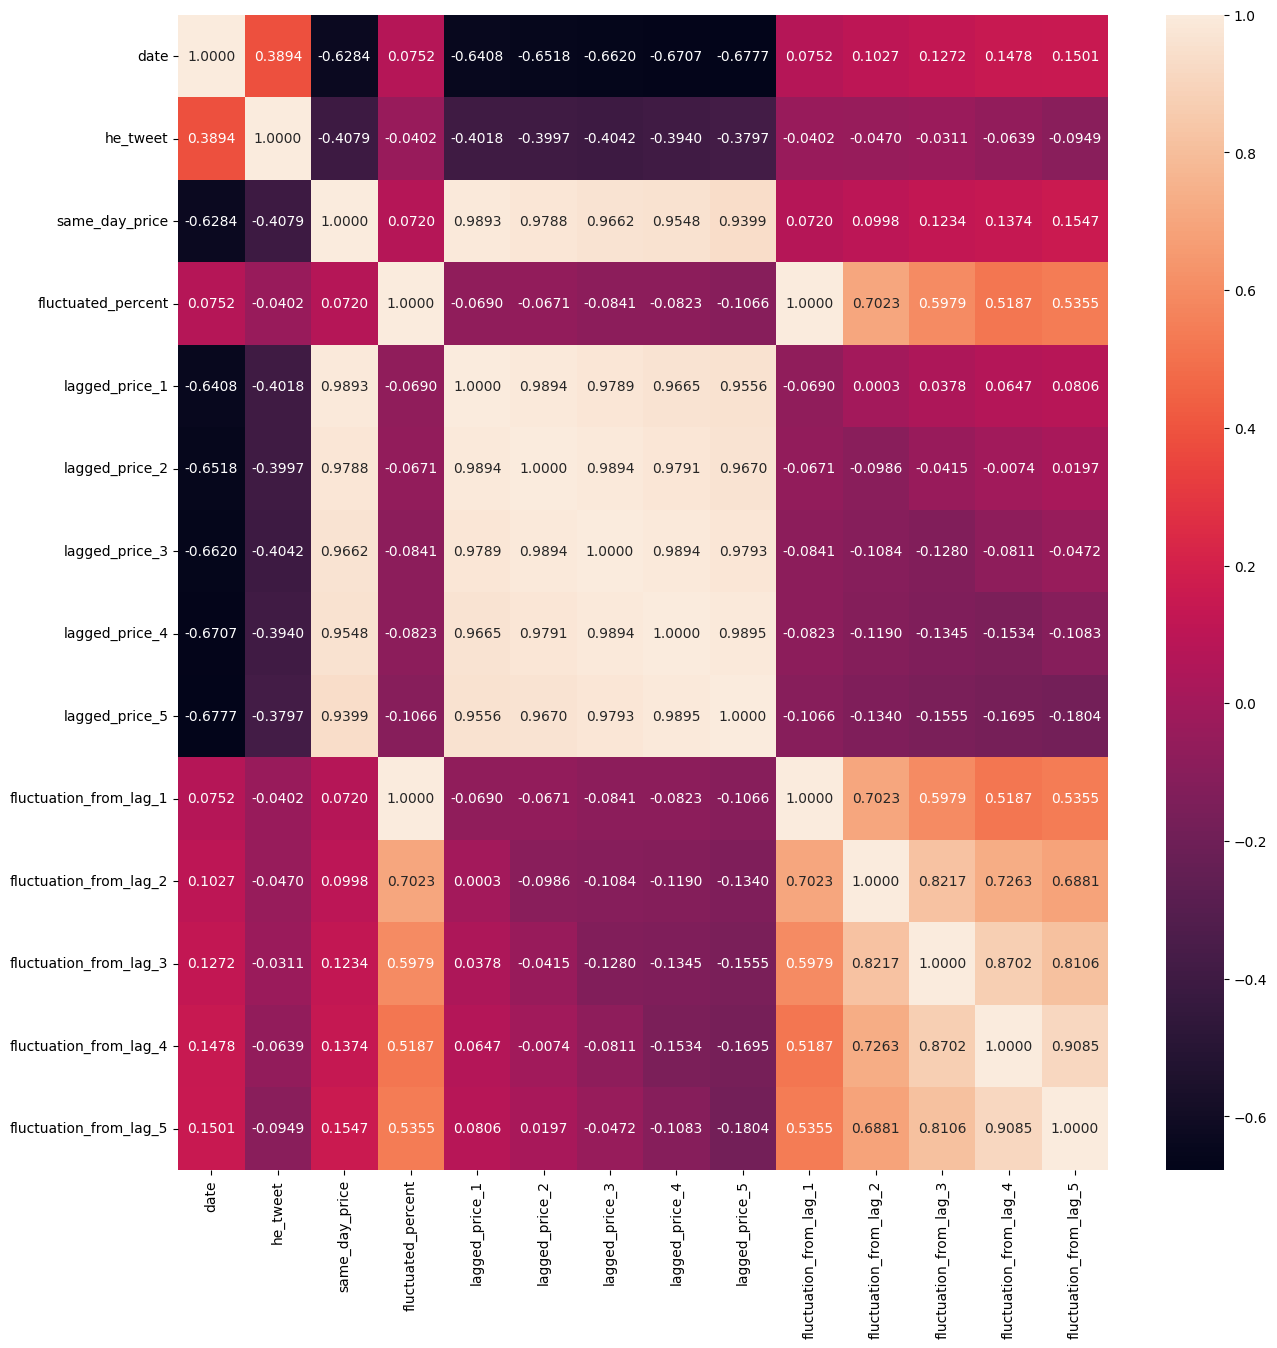

In [ ]:
tt_corr2 = tweet_tesla.corr()
plt.figure(figsize= (15,15))
sns.heatmap(tt_corr2, annot=True, fmt='.4f')

##From the above heatmap, we notice that:

The correlation coefficient between he_tweet and same_day_price is -0.4079, indicating a moderate negative correlation. Comparing to the rest of the lagged price (1,2,3,4,5), same day has the highest, which suggest investor might react immediately towards (Elon Musk)EM's tweet.
The correlation of same day price and lagged price (1,2,3,4,5) is around (0.9893 - 0.9399), which is high. Reflecting that past prices are strong predictors of current prices.
The correlation of fluctuation of 5 day lagged between he_tweet and price is the highest among other fluctuation lagged (same day, 1,2,3,4), suggesting that market take longer than 4 days to fully react to EM's tweet, a delayed effect from the past price.

#Binning Tweets

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid", palette="muted")

bins= [0, 10, 20, 30, 40, 50, 60]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60']
tweet_tesla['binned_he_tweet'] = pd.cut(tweet_tesla['he_tweet'], bins=bins, labels=labels, right=True)

#creating a new dataframe tt2 for binned column
tt2 = tweet_tesla.copy()
tt2.drop(columns=['date', 'he_tweet', 'lagged_price_1', 'lagged_price_2', 'lagged_price_3', 'lagged_price_4', 'lagged_price_5', \
                   'fluctuation_from_lag_1', 'fluctuation_from_lag_2', 'fluctuation_from_lag_3', 'fluctuation_from_lag_4'], inplace=True)

In [ ]:
tt2_avg_price = tt2.groupby(tt2['binned_he_tweet'])['same_day_price'].mean()
tt2_avg_price = pd.DataFrame(tt2_avg_price)


<ipython-input-30-b171ae3cf29a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tt2_avg_price = tt2.groupby(tt2['binned_he_tweet'])['same_day_price'].mean()


In [ ]:
#as we found that fluctuation for 5 day lag has better correlation to he_tweet than others
#thus plotting for 5 days lagged fluctuation
tt2_fluc_5d = tt2.groupby(tt2['binned_he_tweet'])['fluctuation_from_lag_5'].mean()



<ipython-input-31-676d47b6dca3>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tt2_fluc_5d = tt2.groupby(tt2['binned_he_tweet'])['fluctuation_from_lag_5'].mean()


In [ ]:
# Ensuring Tweets were Binned correctly

# How many days per bin?
days_per_bin = daily_counts['bin'].value_counts().sort_index()
print("Number of days in each bin:\n", days_per_bin)

# Verify every tweet has exactly one bin
missing_bins = tweets['bin'].isna().sum()
print(f"\nTweets without a bin assignment: {missing_bins}")

# Check total tweets recomputed from days_per_bin * avg tweets
avg_tweets = daily_counts.groupby('bin')['tweet_count'].mean().round(1)
print("\nAverage tweets per day by bin:\n", avg_tweets)


Number of days in each bin:
 bin
0-10     113
11-20    115
21-30     55
31-40     37
41-50     11
51-60      6
Name: count, dtype: int64

Tweets without a bin assignment: 0

Average tweets per day by bin:
 bin
0-10      5.5
11-20    15.4
21-30    25.4
31-40    34.9
41-50    44.7
51-60    56.0
Name: tweet_count, dtype: float64


<ipython-input-42-d0e07a958be6>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tweets = daily_counts.groupby('bin')['tweet_count'].mean().round(1)


<ipython-input-32-e5dbfd6c6a13>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
<ipython-input-32-e5dbfd6c6a13>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


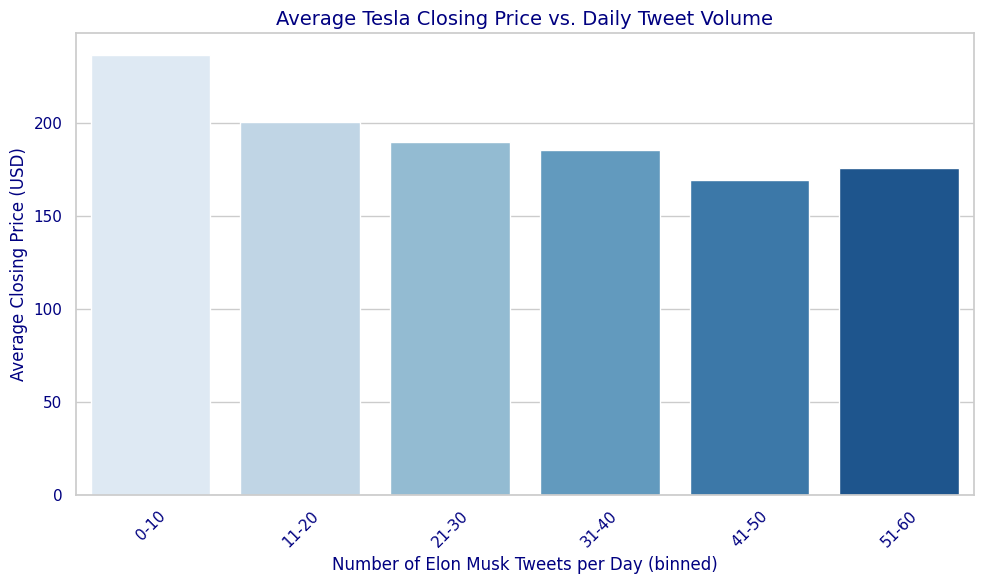

<ipython-input-32-e5dbfd6c6a13>:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
<ipython-input-32-e5dbfd6c6a13>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


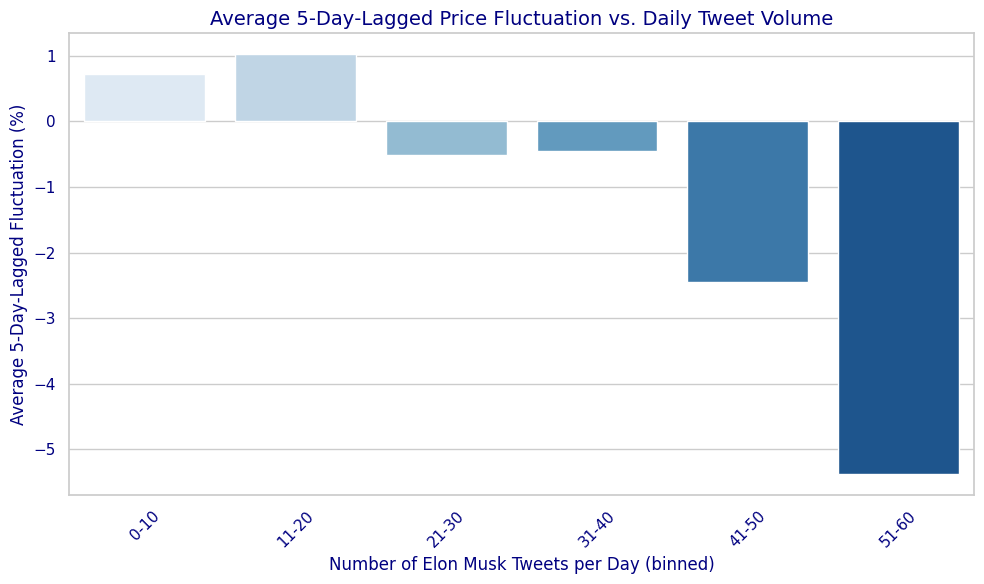

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set a clean white background with blue palette
sns.set_theme(style="whitegrid", palette="Blues")

# 1) Average Tesla Closing Price by Tweet Volume Bin
df_price = tt2_avg_price.reset_index().rename(
    columns={'binned_he_tweet':'Tweet Volume Bin','same_day_price':'Average Close Price'}
)
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_price,
    x='Tweet Volume Bin',
    y='Average Close Price',
    palette='Blues',
    edgecolor="white",
    estimator=np.mean,
    ci="sd"
)
plt.title("Average Tesla Closing Price vs. Daily Tweet Volume", fontsize=14, color='navy')
plt.xlabel("Number of Elon Musk Tweets per Day (binned)", fontsize=12, color='navy')
plt.ylabel("Average Closing Price (USD)", fontsize=12, color='navy')
plt.xticks(rotation=45, color='navy')
plt.yticks(color='navy')
plt.tight_layout()
plt.show()



# 3) Average 5‑Day‑Lagged Price Fluctuation % by Tweet Volume Bin
df_fluc5 = tt2_fluc_5d.reset_index().rename(
    columns={'binned_he_tweet':'Tweet Volume Bin','fluctuation_from_lag_5':'Avg 5‑Day‑Lagged Fluctuation %'}
)
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_fluc5,
    x='Tweet Volume Bin',
    y='Avg 5‑Day‑Lagged Fluctuation %',
    palette='Blues',
    edgecolor="white",
    estimator=np.mean,
    ci="sd"
)
plt.title("Average 5‑Day‑Lagged Price Fluctuation vs. Daily Tweet Volume", fontsize=14, color='navy')
plt.xlabel("Number of Elon Musk Tweets per Day (binned)", fontsize=12, color='navy')
plt.ylabel("Average 5‑Day‑Lagged Fluctuation (%)", fontsize=12, color='navy')
plt.xticks(rotation=45, color='navy')
plt.yticks(color='navy')
plt.tight_layout()
plt.show()


##Analysis from the bar plot
**From the bar plot above:**

*Average Price (tt2_avg_price):*

The average Tesla stock price is highest when Elon Musk's tweets fall within the range of 0-10 tweets. This suggests that a lower volume of tweets may correlate with higher stock prices, possibly indicating that investors react more positively to fewer, more impactful tweets.

*5-Day Fluctuation (tt2_fluc_5d):*

The 5-day fluctuation data indicates that Tesla's stock experiences positive fluctuations for the tweet ranges 0-10 and 11-20. However, there is a significant negative fluctuation for the ranges 41-50 and 51-60, suggesting that while initial reactions to tweets in these ranges may be positive, they are followed by a drastic slump in stock price over the subsequent days. This could imply that the market may overreact to a high volume of tweets initially, leading to a correction afterward.

##Conclusion
The optimal range of Elon Musk's tweets that positively influences Tesla's stock movement appears to be 0-10 tweets. This range not only correlates with the highest average stock price but also shows positive fluctuations in both same-day and 5-day metrics.

The analysis suggests that while Tesla's stock may initially react positively to a higher volume of tweets (41-50, 51-60), there is a delayed negative effect, indicating that the market may be correcting itself after an initial overreaction.

##Key Findings

**Visual 1**

Closing Price Decline: When Elon Musk’s tweet volume exceeds 50 per day, Tesla’s average closing price falls by roughly $60 compared to low‑tweet days, illustrating that heavy social‑media activity drags on baseline valuation.

**Visual 2**

Medium‑Term Pullback: The buzz of heavy‑tweet days reverses into an average five‑day drop of –5.39 %, whereas low‑tweet days enjoy a +0.70 % gain, demonstrating that initial excitement gives way to meaningful sell‑offs.

In sum, our hypothesis is confirmed: Elon Musk’s tweet volume does influence Tesla’s stock, but the pattern is one of short‑lived upside followed by deeper medium‑term declines. For Tesla’s marketing stakeholders (or its stand‑in social‑media “team”), the lesson is clear: more isn’t always better—impactful, carefully timed messages will outperform a high‐volume blitz in driving sustainable stock performance.

# Topic Modelling: To see what topics prevail in 0-10 window vs 51-60 window to determine what cause the positive and negative 5 day fluctuation respectively.

In [ ]:
# 1. Downgrade numpy
#!pip install numpy==1.23.5

# 2. Reinstall gensim and numba against this numpy
#!pip install --upgrade --force-reinstall gensim numba


In [ ]:

import pandas as pd
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import re



In [ ]:
# 1. Load & preprocess tweet data
tweets = pd.read_csv('/content/drive/MyDrive/elon_musk_tweets 3.csv', parse_dates=['date'])
tweets = tweets.dropna(subset=['text'])  # remove NA texts


In [ ]:
# 2. Bin daily tweet counts
tweets['date_only'] = tweets['date'].dt.date
daily_counts = tweets.groupby('date_only').size().reset_index(name='tweet_count')
bins = [0,10,20,30,40,50,60]
labels = ['0-10','11-20','21-30','31-40','41-50','51-60']
daily_counts['bin'] = pd.cut(daily_counts['tweet_count'], bins=bins, labels=labels, include_lowest=True)
tweets = tweets.merge(daily_counts[['date_only','bin']], on='date_only', how='left')

# 3. Update stopwords to include 'amp'
custom_stopwords = STOPWORDS.union({'amp'})

# 4. Preprocessing function
def preprocess(text):
    text = re.sub(r'http\S+|@\S+|[^a-zA-Z\s]', '', text.lower())  # remove URLs, mentions, non-alpha
    tokens = simple_preprocess(text, deacc=True)
    return [t for t in tokens if t not in custom_stopwords and len(t) > 2]

# 5. Topic modeling for low and high bins
for target_bin in ['0-10', '51-60']:
    docs = tweets[tweets['bin'] == target_bin]['text'].map(preprocess)
    dictionary = corpora.Dictionary(docs)
    corpus = [dictionary.doc2bow(doc) for doc in docs]
    lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10, random_state=42)
    print(f"\nTop words for tweets in bin '{target_bin}':")
    for i in range(5):
        print(f" Topic {i+1}:", lda.print_topic(i, 10))


Top words for tweets in bin '0-10':
 Topic 1: 0.013*"twitter" + 0.013*"great" + 0.009*"work" + 0.009*"team" + 0.007*"tesla" + 0.006*"maybe" + 0.006*"party" + 0.006*"people" + 0.005*"falcon" + 0.005*"real"
 Topic 2: 0.012*"true" + 0.010*"year" + 0.009*"major" + 0.007*"people" + 0.007*"accurate" + 0.006*"beta" + 0.006*"coming" + 0.006*"soon" + 0.005*"tesla" + 0.005*"lot"
 Topic 3: 0.020*"good" + 0.008*"point" + 0.007*"absolutely" + 0.007*"thats" + 0.007*"like" + 0.006*"tesla" + 0.006*"thread" + 0.006*"important" + 0.006*"team" + 0.005*"work"
 Topic 4: 0.010*"exactly" + 0.008*"years" + 0.008*"wrong" + 0.007*"yeah" + 0.006*"change" + 0.005*"year" + 0.005*"interesting" + 0.005*"ago" + 0.005*"pretty" + 0.004*"like"
 Topic 5: 0.014*"twitter" + 0.011*"tesla" + 0.009*"good" + 0.008*"car" + 0.008*"day" + 0.007*"time" + 0.007*"thanks" + 0.007*"actually" + 0.006*"starship" + 0.006*"month"

Top words for tweets in bin '51-60':
 Topic 1: 0.014*"good" + 0.013*"twitter" + 0.013*"day" + 0.013*"interes

##Key inference
Low‑volume days (0–10) topics focus on technical/product discussion (e.g., “tesla,” “falcon,” “starship,” “team”) and broader event-related chatter (“party,” “work,” “thread”).

High‑volume days (51–60) topics instead emphasize sentiment markers and platform governance (e.g., “truth,” “correct,” “sbf,” “accounts,” “realtime”), suggesting spikes coincide with debates over accuracy and moderation.



## LDA Keywords and Meanings by Bin

| Bin   | Keyword  | Meaning                                                  |
| ----- | -------- | -------------------------------------------------------- |
| 0–10  | tesla    | Direct product chatter—vehicle launches, factory updates |
| 0–10  | falcon   | SpaceX’s Falcon rocket—engineering news and missions     |
| 0–10  | starship | SpaceX’s next‑gen spacecraft—technical excitement        |
| 0–10  | car      | Everyday references to Tesla models—consumer optimism    |
| 51–60 | sbf      | Sam Bankman‑Fried—crypto controversy marker              |
| 51–60 | truth    | Debates about “truth”—political discourse                |
| 51–60 | accounts | Content moderation—governance debates                    |
| 51–60 | realtime | Live updates on platform policy enforcement              |


#Despite 51–60 days having ~60 tweets and a richer word set, the presence of these targeted keywords pinpoints the controversy‑driven topics that align with negative 5‑day price swings, versus the product‑focused buzz on 0–10 days.



## Sample Low‑Volume Bin (0–10) Tweets from Dataset

| Date       | Tweet                                                                                                                                  |
| ---------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| 2022‑07‑11 | excited to work with tesla service to enable same-hour service as often as possible! applying formula 1 pit crew techniques to teslas. |
| 2022‑07‑21 | SpaceX’s next-gen spacecraft—technical excitement                                                                                      |


## Sample High‑Volume Bin (51–60) Tweets from Dataset

| Date       | Tweet                                                                                                                                                                   |
| ---------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 2022‑11‑23 | @semafor semafor is owned by sbf. this is a major conflict of interest for crypto news                                                                                  |
| 2022‑11‑23 | @BillyM2k The more I learn, the worse it gets. The world should know the truth of what has been happening at Twitte… [https://t.co/w6T8BBLcfs](https://t.co/w6T8BBLcfs) |
| 2022‑11‑23 | @semaforben to be direct, the very real concern is if people lose trust in the system                                                                                   |


## Deciphering political tweet content by bin

In [ ]:
# 1. Downgrade NumPy
#!pip install numpy==1.23.5 --force-reinstall

# 2. Reinstall statsmodels against the downgraded NumPy
#!pip install statsmodels --upgrade --force-reinstall


In [ ]:
# 1. Define political/controversial keywords
political_keywords = [
    'government', 'politics', 'election', 'policy', 'regulation',
    'law', 'congress', 'senate', 'democrat', 'republican',
    'political', 'vote', 'censorship', 'freedom', 'liberty',
    'trump', 'biden', 'impeachment', 'cancel', 'media',
    'conservative', 'liberal', 'speech', 'crypto', 'sbf'
]


In [ ]:
# 2. Flag tweets containing any political keyword
pattern = r'\b(' + '|'.join(map(re.escape, political_keywords)) + r')\b'
tweets['political_flag'] = tweets['text'].str.contains(pattern, regex=True, na=False)

# 3. Summarize counts and percentages by bin
summary = (
    tweets.groupby('bin')['political_flag']
          .agg(total_tweets='count', political_tweets='sum')
          .loc[['0-10','51-60']]
)
summary['pct_political'] = summary['political_tweets'] / summary['total_tweets'] * 100

print("Political Tweet Summary by Bin (%):")
print(summary)

Political Tweet Summary by Bin (%):
       total_tweets  political_tweets  pct_political
bin                                                 
0-10            616                10       1.623377
51-60           336                10       2.976190


<ipython-input-39-c8f2e6b36ee0>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tweets['political_flag'] = tweets['text'].str.contains(pattern, regex=True, na=False)
<ipython-input-39-c8f2e6b36ee0>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tweets.groupby('bin')['political_flag']


In [ ]:
from scipy.stats import norm

In [ ]:
# counts and totals from your summary
count1 = summary.loc['0-10','political_tweets']
n1     = summary.loc['0-10','total_tweets']
count2 = summary.loc['51-60','political_tweets']
n2     = summary.loc['51-60','total_tweets']

# proportions
p1 = count1 / n1
p2 = count2 / n2

# pooled prop & standard error
p_pool = (count1 + count2) / (n1 + n2)
se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

# z‑stat & two‑tailed p‑value
z_stat = (p1 - p2) / se
p_val  = 2 * (1 - norm.cdf(abs(z_stat)))

print(f"Z = {z_stat:.3f}, p‑value = {p_val:.3f}")

Z = -1.391, p‑value = 0.164


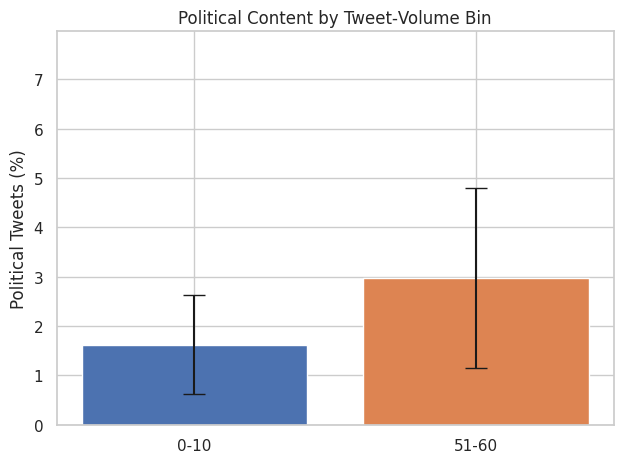

In [ ]:


def ci(count, n, alpha=0.05):
    p = count/n
    z = norm.ppf(1-alpha/2)
    se = np.sqrt(p*(1-p)/n)
    return p*100, (p - z*se)*100, (p + z*se)*100

labels = ['0-10','51-60']
heights = []
errors = []

for lbl in labels:
    cnt, tot = summary.loc[lbl, ['political_tweets','total_tweets']]
    p, low, high = ci(cnt, tot)
    heights.append(p)
    errors.append([p - low, high - p])

# plot
fig, ax = plt.subplots()
ax.bar(labels, heights, yerr=np.array(errors).T, capsize=8, color=['#4c72b0','#dd8452'])
ax.set_ylabel('Political Tweets (%)')
ax.set_title('Political Content by Tweet‑Volume Bin')
ax.set_ylim(0, max(heights) + 5)
plt.tight_layout()
plt.show()
